In [ ]:
!pip install -U arch statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 87.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from arch import arch_model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df=pd.read_csv('SPY.csv', parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [ ]:
df['LogRet']=np.log(df['Close']).diff()

In [ ]:
df2 = df.iloc [1:].copy()

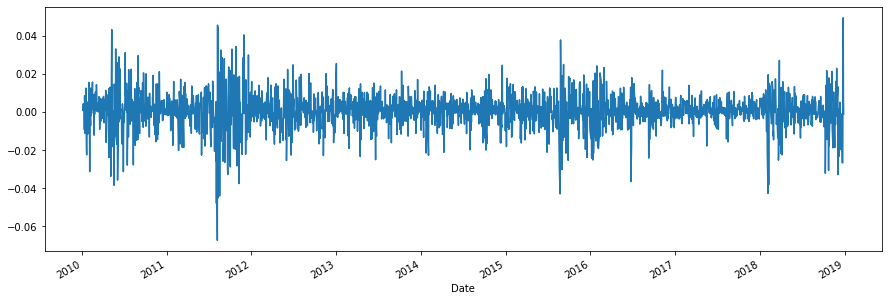

In [ ]:
df2[ 'LogRet' ].plot(figsize=(15, 5));
 

In [ ]:
df2['Ysq'] = df['LogRet'] ** 2

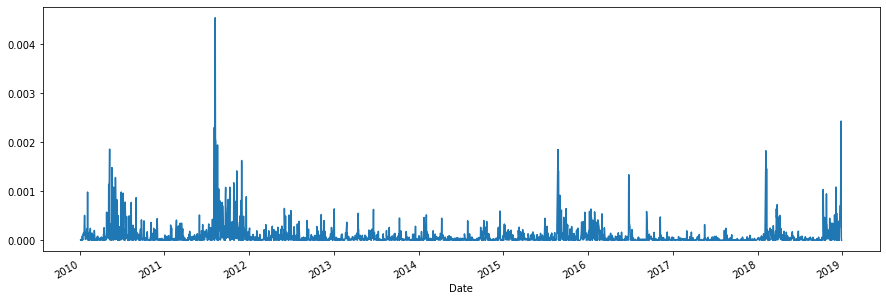

In [ ]:
df2[ 'Ysq' ].plot(figsize=(15, 5));

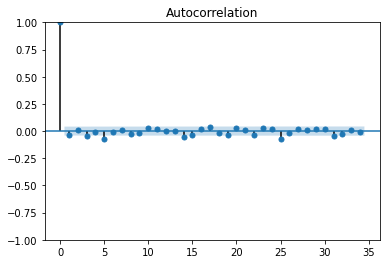

In [ ]:
plot_acf (df2[ 'LogRet']);

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


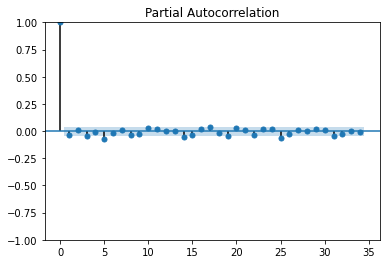

In [ ]:
plot_pacf (df2[ 'LogRet']);
 

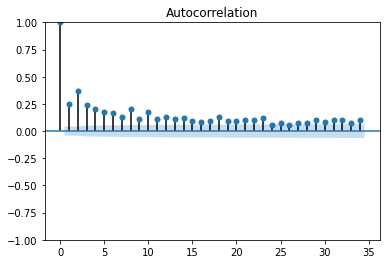

In [ ]:
plot_acf (df2[ 'Ysq']);


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


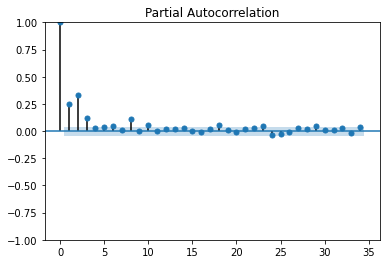

In [ ]:
plot_pacf (df2[ 'Ysq']);
 

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


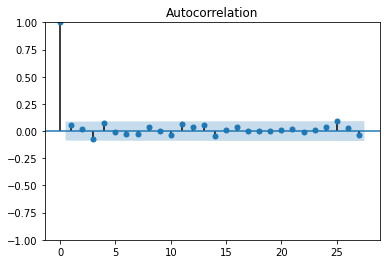

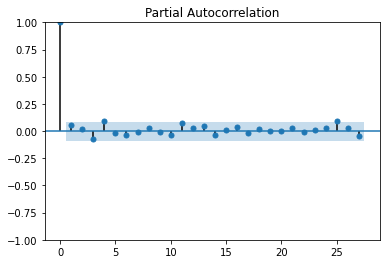

In [ ]:
noise_sq = np.random.randn (500) **2
plot_acf (noise_sq);
plot_pacf (noise_sq);

In [ ]:
Ntest = 500
train = df2.iloc [:-Ntest] [['LogRet']]. copy()
test = df2.iloc [-Ntest:][['LogRet' ]].copy()

In [ ]:
model = arch_model(train[ 'LogRet'], vol='GARCH', p=1, q=1)

In [ ]:
res=model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2668736234320.3926
Iteration:      2,   Func. Count:     19,   Neg. LLF: 681495796603480.9
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2099329788588.272
Iteration:      4,   Func. Count:     47,   Neg. LLF: 1148800069593708.8
Iteration:      5,   Func. Count:     62,   Neg. LLF: 20672973870.71515
Iteration:      6,   Func. Count:     75,   Neg. LLF: 1.0138966357037168e+16
Iteration:      7,   Func. Count:     90,   Neg. LLF: 1121326932594.181
Iteration:      8,   Func. Count:    103,   Neg. LLF: 207123748884025.1
Iteration:      9,   Func. Count:    118,   Neg. LLF: 14017524989.133617
Iteration:     10,   Func. Count:    131,   Neg. LLF: 275892953358924.4
Iteration:     11,   Func. Count:    145,   Neg. LLF: -5876.685308750586
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5876.68531086581
            Iterations: 15
            Function evaluations: 145
            Gradient evalu

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.532e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
m = train['LogRet' ].mean()
s=test['LogRet' ].std()
train['Scaled']=(train[ 'LogRet' ]-m) / s
test['Scaled']=(test['LogRet' ]-m) / s
df2['Scaled']=(df2[ 'LogRet']-m) / s

In [ ]:
arch1=arch_model(train['Scaled'], vol='ARCH', p=1)

In [ ]:
res_arch1= arch1.fit (update_freq=10)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2758.9937048800584
            Iterations: 7
            Function evaluations: 36
            Gradient evaluations: 7


In [ ]:
res_arch1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2758.99
Distribution:                  Normal   AIC:                           5523.99
Method:            Maximum Likelihood   BIC:                           5540.41
                                        No. Observations:                 1762
Date:                Thu, Feb 02 2023   Df Residuals:                     1761
Time:                        21:38:57   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0150  2.759e-02      0.545      0.586 [-3.904e-02,6.910e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.1523  9.460e-02     12.181  3.936e-34   [  0.967,  1.338]
alpha[1]       0.1771  4.774e-02      3.709  2.079e-04 [8.350e-02,  0.271]
==========================================================================

Covariance estimator: robust
"""

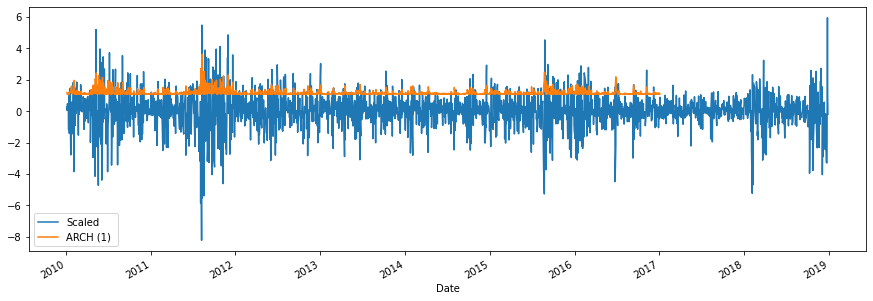

In [ ]:
df2['ARCH (1) ']= res_arch1.conditional_volatility
df2[['Scaled', 'ARCH (1) ']].plot(figsize=(15, 5));

In [ ]:
res_arch1. forecast (horizon=Ntest)
 

/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [ ]:
fcast_arch1 = res_arch1. forecast (horizon=Ntest, reindex=True)
 

In [ ]:
fcast_arch1
 

In [ ]:
fcast_arch1.mean
 

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fcast_arch1 = res_arch1.forecast (horizon=Ntest, reindex=False)

In [ ]:
fcast_arch1.mean
 

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,...,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031,0.015031


In [ ]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,1.284314,1.379741,1.396637,1.399629,1.400159,1.400253,1.400269,1.400272,1.400273,1.400273,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273


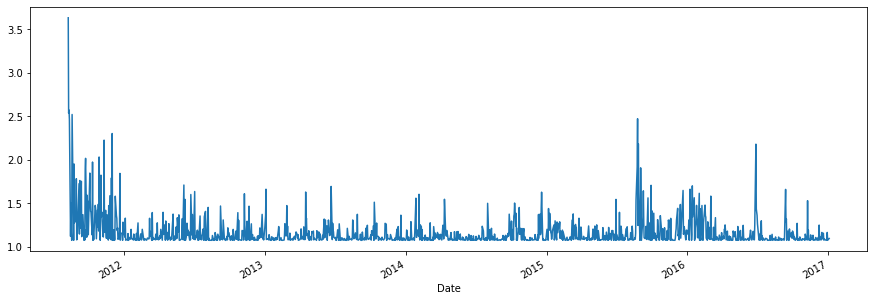

In [ ]:
df2.loc [ '2011-08-09': ]['ARCH (1) ' ].plot(figsize=(15, 5));

In [ ]:
fcast_arch1 =res_arch1.forecast(horizon=Ntest, reindex=True, start='2011-08-01')
 

In [ ]:
fcast_arch1.variance['2011-07-28':'2011-08-05']

 
 

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.211915,1.366921,1.394367,1.399227,1.400088,1.400240,1.400267,1.400272,1.400273,1.400273,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273
2011-08-02,2.972328,1.678627,1.449559,1.409000,1.401818,1.400546,1.400321,1.400281,1.400274,1.400273,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273
2011-08-03,1.214825,1.367437,1.394459,1.399243,1.400090,1.400240,1.400267,1.400272,1.400273,1.400273,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273
2011-08-04,7.294964,2.444009,1.585081,1.432996,1.406067,1.401299,1.400454,1.400305,1.400278,1.400274,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273
2011-08-05,1.162906,1.358244,1.392831,1.398955,1.400039,1.400231,1.400265,1.400271,1.400273,1.400273,...,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273,1.400273


In [ ]:
fcast_arch1.variance.loc ['2011-08-09'].to_numpy().shape

(500,)

In [ ]:
df2.index.get_loc ('2011-08-09')

402

In [ ]:
df2.index [402 +500]

Timestamp('2013-08-06 00:00:00')

In [ ]:
df2.loc ['2011-08-10':'2013-08-06', 'ARCH (1) Forecast'] = np.sqrt(
fcast_arch1.variance.loc ['2011-08-09'].to_numpy ( ) )

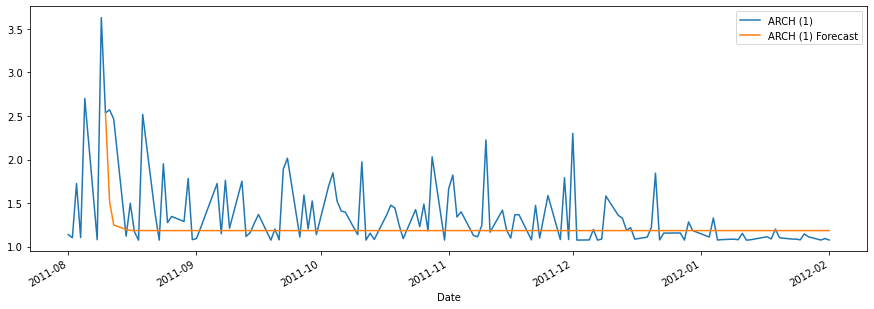

In [ ]:
df2.loc['2011-08-01':'2012-02-01 '][['ARCH (1) ','ARCH (1) Forecast']].plot(figsize=(15, 5));

In [ ]:
fcast_arch1.variance.index.get_loc('2011-08-17')

408

In [ ]:
df2.index [408 +500]

Timestamp('2013-08-14 00:00:00')

In [ ]:
df2.loc [ '2011-08-18':'2013-08-14', 'ARCH (1) Forecast Low'] = np.sqrt(
fcast_arch1.variance.loc ['2011-08-17'].to_numpy ( ))

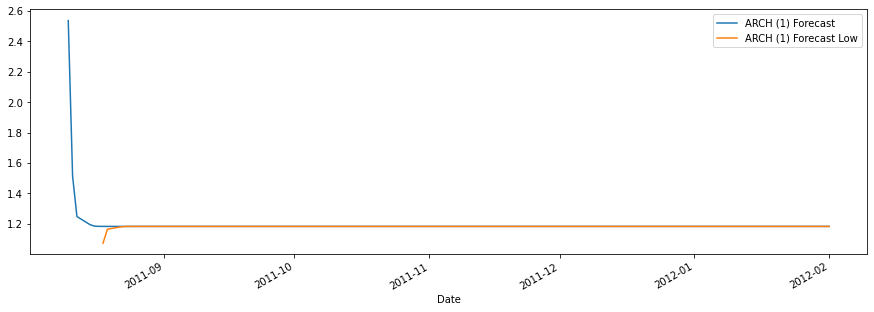

In [ ]:
plot_cols=['ARCH (1) Forecast', 'ARCH (1) Forecast Low']
df2.loc [ '2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));
 

In [ ]:
res_arch1.params

mu          0.015031
omega       1.152335
alpha[1]    0.177064
Name: params, dtype: float64

In [ ]:
 res_arch1.params['omega'] / (1 - res_arch1.params['alpha[1]'])

1.4002727344070522

In [ ]:
fcast_arch1.variance.loc ['2011-08-17'].to_numpy ( )[-1]

1.4002727344070522

In [ ]:
fcast_arch1.variance.loc ['2011-08-09'].to_numpy ( )[-1]

1.4002727344070522

In [ ]:
 garch11=arch_model(train[ 'Scaled'], vol='GARCH', p=1, q=1)



In [ ]:
 res_garch11=garch11.fit (update_freq=10)


Iteration:     10,   Func. Count:     62,   Neg. LLF: 2570.1176218396467
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2570.1176176707686
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12


In [ ]:
res_garch11.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2570.12
Distribution:                  Normal   AIC:                           5148.24
Method:            Maximum Likelihood   BIC:                           5170.13
                                        No. Observations:                 1762
Date:                Thu, Feb 02 2023   Df Residuals:                     1761
Time:                        23:48:28   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0340  2.213e-02      1.538      0.124 [-9.336e-03,7.740e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0660  1.492e-02      4.427  9.560e-06 [3.680e-02,9.528e-02]
alpha[1]       0.1499  2.499e-02      6.000  1.971e-09     [  0.101,  0.199]
beta[1]        0.8021  2.545e-02     31.515 5.444e-218     [  0.752,  0.852]
============================================================================

Covariance estimator: robust
"""

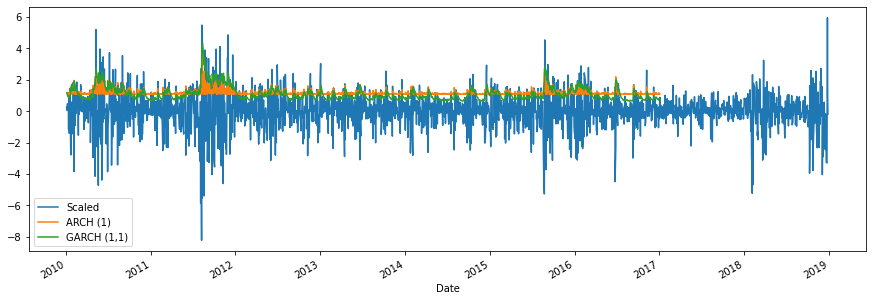

In [ ]:
df2['GARCH (1,1)']=res_garch11.conditional_volatility
df2[['Scaled', 'ARCH (1) ', 'GARCH (1,1)']].plot(figsize=(15,5));


In [ ]:
fcast_garch11 = res_garch11. forecast ( 
horizon=Ntest, reindex=False, start='2011-08-09')

In [ ]:
df2.loc [ '2011-08-10':'2013-08-06', 'GARCH (1,1) Forecast']=np.sqrt(
fcast_garch11.residual_variance.loc[ '2011-08-09'].to_numpy ( ))
 



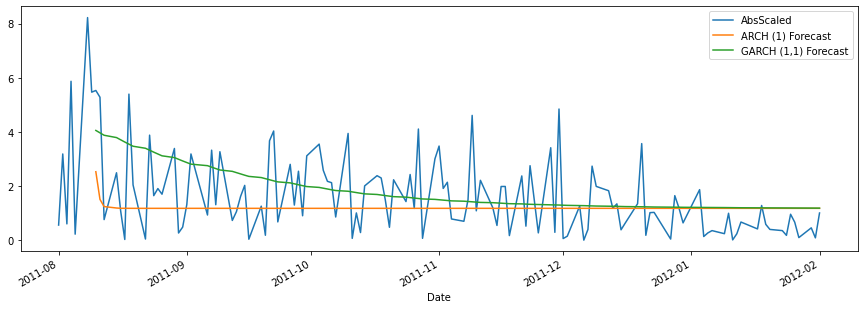

In [ ]:
df2['AbsScaled']=df2['Scaled'].abs()
plot_cols = ['AbsScaled', 'ARCH (1) Forecast', 'GARCH (1,1) Forecast']
df2.loc [ '2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));

In [ ]:
 
garch11t = arch_model(train[ 'Scaled'], vol='GARCH', p=1, q=1, dist='StudentsT')
res_garch11t=garch11t.fit (update_freq=10)
res_garch11t.summary()




Iteration:     10,   Func. Count:     74,   Neg. LLF: 2531.192054224512
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2531.189462796183
            Iterations: 14
            Function evaluations: 97
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2531.19
Distribution:      Standardized Student's t   AIC:                           5072.38
Method:                  Maximum Likelihood   BIC:                           5099.75
                                              No. Observations:                 1762
Date:                      Fri, Feb 03 2023   Df Residuals:                     1761
Time:                              00:14:22   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0559  2.006e-02      2.788  5.310e-03 [1.660e-02,9.523e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0562  1.308e-02      4.296  1.743e-05 [3.056e-02,8.184e-02]
alpha[1]       0.1615  2.507e-02      6.442  1.177e-10     [  0.112,  0.211]
beta[1]        0.8081  2.353e-02     34.347 1.537e-258     [  0.762,  0.854]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.5805      0.733      7.610  2.741e-14 [  4.143,  7.018]
========================================================================

Covariance estimator: robust
"""

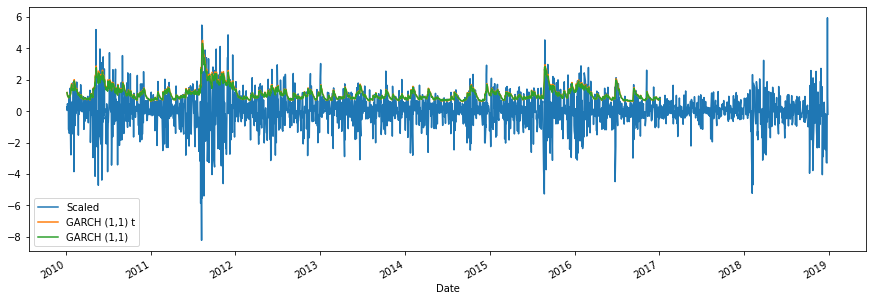

In [ ]:
df2['GARCH (1,1) t']=res_garch11t.conditional_volatility
df2[['Scaled', 'GARCH (1,1) t', 'GARCH (1,1)']].plot(figsize=(15, 5));



In [ ]:
 fcast_garchllt = res_garchllt.forecast (
horizon=Ntest, reindex=False, start='2011-08-09')



In [ ]:
df2.loc ['2011-08-10':'2013-08-06', 'GARCH (1,1)t Forecast'] = np.sqrt(
fcast_garchllt.residual_variance.loc [ '2011-08-09'].to_numpy ( ))



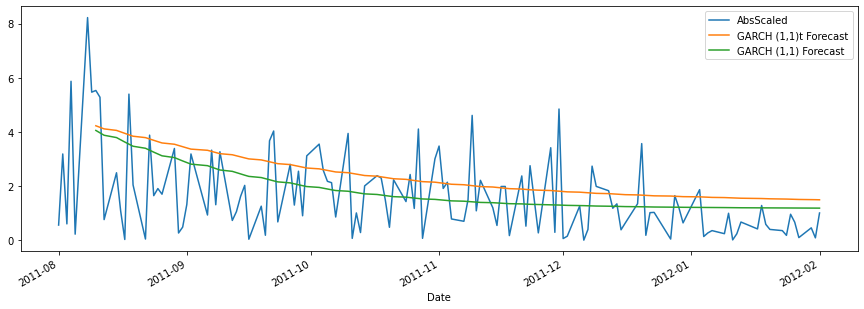

In [ ]:
plot_cols =['AbsScaled', 'GARCH (1,1)t Forecast', 'GARCH (1,1) Forecast']
df2.loc ['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5));


In [ ]:
train_idx = df2.index <= train.index[-1]
test_idx = ~train_idx

 

In [ ]:

df2.loc [train_idx, 'GARCH (p, q) Train']=res_garch11t.conditional_volatility
df2.loc [test_idx, 'GARCH (p, q) Test'] = np.sqrt(
  fcast_garch11.variance.iloc [-1].to_numpy ( ) )


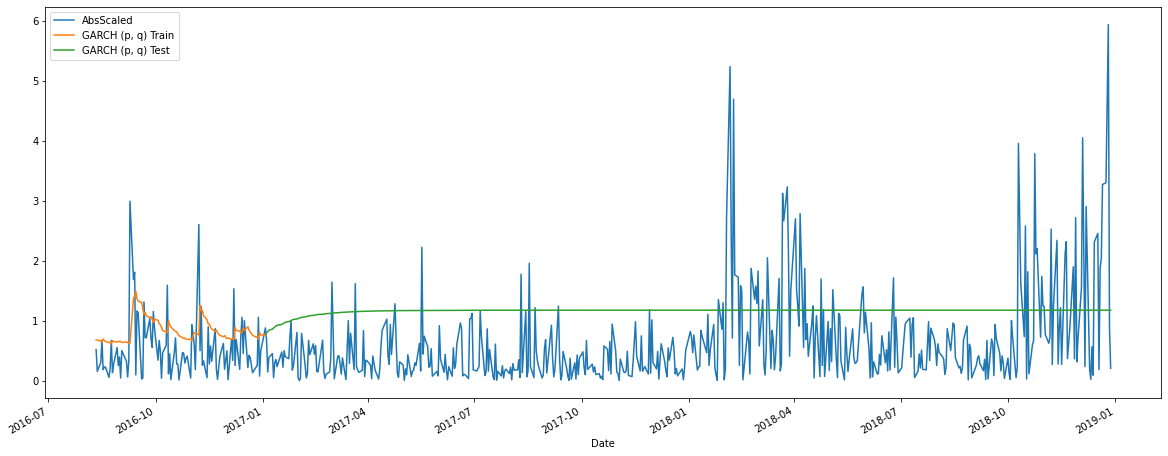

In [ ]:

plot_cols=['AbsScaled', 'GARCH (p, q) Train', 'GARCH (p, q) Test']
df2.iloc[-(Ntest+100):][plot_cols].plot(figsize=(20,8));